In [46]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import sprt

In [20]:
data = pd.read_csv("https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/labs/lab2/data/2.1.csv")
data

,with vaccine,without vaccine
0,h,h
1,h,s
2,h,s
3,h,h
4,h,h
5,h,s
6,h,h
7,h,s
8,h,s
9,h,s


In [15]:
data.describe()

,with vaccine,without vaccine
count,30,30
unique,2,2
top,h,s
freq,25,16


### Запишем задачу формально :
$H_0$ : Вероятность заразиться у человека с вакциной меньше, чем у человека без вакцины $\\$
$H_1$ : наоборот(Вероятность заразиться у человека с вакциной больше либо равна, чем у человека без вакцины

#### введём обозначения : 
$p_u$ -- верхняя граница $\\$
$p_d$ -- нижняя граница 


$\alpha$ -- уровень значимости(допускаемая вероятность ошибки первого рода) отвергнуть верную гипотезу $H_0 (p \leq p_d) \\$
$\beta$ -- допускаемая вероятность ошибки второго рода принять неверную гипотезу $H_0 (p_u \leq p)$

#### $H_0 : p \leq p_d$

#### $H_1 : p_u \leq p$

### Выборки : 

#### $X^{30} = (X_{1}, X_{2},...,X_{30})$

#### $Y^{30} = (Y_{1}, Y_{2},...,Y_{30})$

### Статистика

#### $ d_m(X^{30}, Y^{30}) = \sum_{i=1}^{30} (1-X_{i}) Y_{i} $

### Пусть $A = \frac{1-\beta}{\alpha}$

###  $B = \frac{\beta}{1-\alpha}$

### $ p = \frac{1-(\frac{1-p_u}{1-p_d})^x}{(\frac{p_u}{p_d})^x - (\frac{1-p_u}{1-p_d})^x}$

### $z$ -- решение уравнения

### Оперативная характеристика $L = \frac{A^z - 1}{A^z - B^z}$

### Мат. Ожидание : $E = \frac{L \cdot log(B) + (1-L) \cdot log(A)}{p \cdot log(\frac{p}{p_0}) + (1-p) \cdot log(\frac{1-p}{1-p_0})}$

### (По сути используем критерий Вальда)

In [39]:
alpha = 0.05
beta = 0.2
p1 = 0.2
p2 = 0.5

def E(p, p_0, alpha, beta, z):
    A = (1 - beta) / alpha
    B = beta / (1 - alpha)
    L = (A**z - 1)/(A**z - B**z)
    return (L * np.log(B) + (1 - L) * np.log(A))/ (p * np.log(p / p_0) + (1 - p) * np.log((1 - p) / ( 1 - p_0)))

f = lambda x : (1 - ((1 - p2) / (1 - p1))**x) / ((p2 / p1)**x - ((1 - p2) / (1 - p1))**x) - p2

solution = scipy.optimize.root_scalar(f, bracket=[-10, 10], method='brentq')
print("Математическое ожидание числа итераций: {}".format(int(E(p2, p1, alpha, beta, solution.root))))

Математическое ожидание числа итераций: 8


### Воспользуемся последовательным критерием Вальда для оценки среднего количества дней(ошибки первого и второго рода фиксированы)

### $\forall i : data[i][0] > data[i][1] \leftrightarrow$  человек с вакционой с меньшей вероятностью заразиться чем человек без неё

In [50]:
tmp = (data.values == 'h').astype(int)
values = (tmp[:, 0] > tmp[:, 1])

### Формально задачу после преобразования данных можно записать так : найти минимальный шаг, при котором мы покинем область безразличия.

Decision:	Continue

    values  lower   upper
n                        
21      10  5.996   9.120
22      10  6.335   9.459
23      10  6.674   9.798
24      10  7.013  10.137
25      10  7.352  10.476
26      11  7.691  10.815
27      11  8.030  11.154
28      12  8.369  11.493
29      12  8.708  11.832
30      12  9.047  12.171


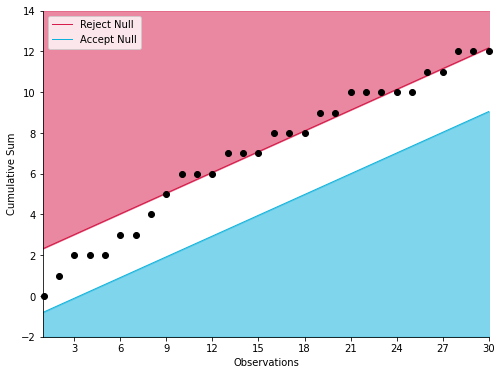

In [48]:
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=p1, h1=p2, values=values)
test.plot()

### Из графика видно, что в районе 10 дней  находится искомый минимум количества дней для вынесения решения по данной гипотезе

### Посмотрим на срез из первых 10 дней

Decision:	Reject

    values  lower  upper
n                       
1        0 -0.785  2.339
2        1 -0.446  2.678
3        2 -0.107  3.017
4        2  0.232  3.356
5        2  0.571  3.695
6        3  0.910  4.034
7        3  1.249  4.373
8        4  1.588  4.712
9        5  1.927  5.051
10       6  2.266  5.390


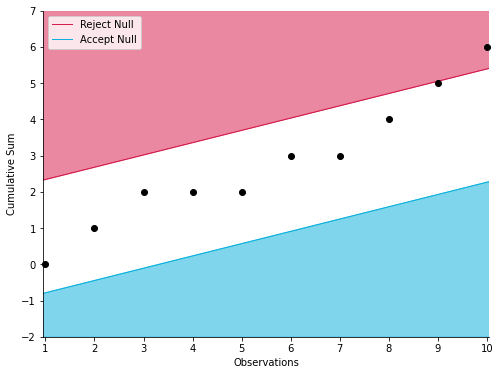

In [49]:
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=p1, h1=p2, values=values[:10])
test.plot()

### И действительно потребуется 10 дней для тестирования, так как уже на 10ом дне мы попадаем в область, в которой гипотеза отклоняется, что означает неработоспособность вакцины, что происходит далее нам не интересно, несмотря на то, что мы далее опять возвращаемся в белую зону(область безразличия), поскольку эти эксперименты в реальности мы не проведем уже